Epoch 0: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Epoch 1: w0 = -0.003043, w1 = 0.060192, w2 = -0.020481, Loss = 0.672996
Epoch 2: w0 = -0.003978, w1 = 0.089781, w2 = -0.025123, Loss = 0.664144
Epoch 3: w0 = -0.004970, w1 = 0.118605, w2 = -0.029173, Loss = 0.655780
Epoch 4: w0 = -0.006092, w1 = 0.146613, w2 = -0.033161, Loss = 0.647875
Epoch 5: w0 = -0.007327, w1 = 0.173843, w2 = -0.037004, Loss = 0.640402
Epoch 6: w0 = -0.008674, w1 = 0.200321, w2 = -0.040718, Loss = 0.633333
Epoch 7: w0 = -0.010127, w1 = 0.226073, w2 = -0.044306, Loss = 0.626643
Epoch 8: w0 = -0.011682, w1 = 0.251124, w2 = -0.047771, Loss = 0.620309
Epoch 9: w0 = -0.013336, w1 = 0.275499, w2 = -0.051117, Loss = 0.614309
Epoch 10: w0 = -0.015086, w1 = 0.299222, w2 = -0.054348, Loss = 0.608622
Epoch 11: w0 = -0.016926, w1 = 0.322317, w2 = -0.057468, Loss = 0.603228
Epoch 12: w0 = -0.018855, w1 = 0.344807, w2 = -0.060480, Loss = 0.598109
Epoch 13: w0 = -0.020867, w1 = 0.366714, w2 = -0.063388, Loss

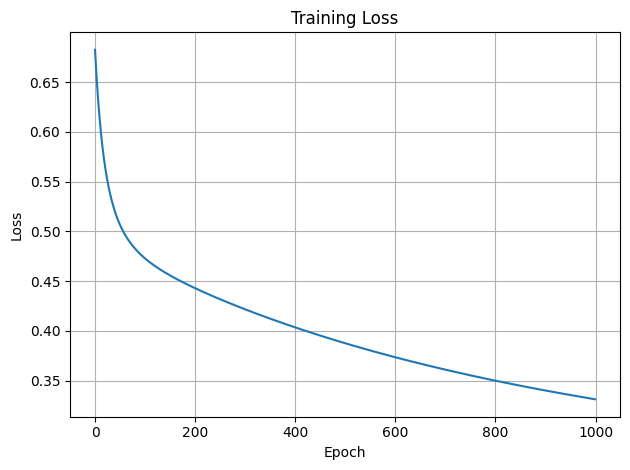

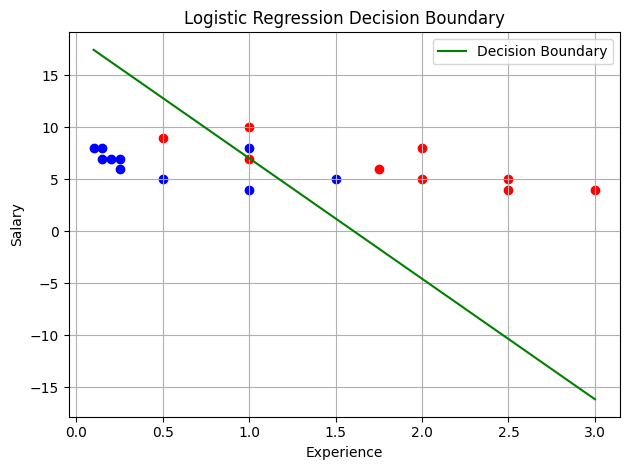

In [75]:
import math
import matplotlib.pyplot as plt

def load_csv(filename):
    X, y = [], []
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            parts = line.strip().split(',')
            if len(parts) != 3:
                continue
            exp, sal, label = float(parts[0]), float(parts[1]), int(parts[2])
            X.append([1, exp, sal])  # Add bias term
            y.append(label)
    return X, y

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(x, w):
    z = sum(x[i] * w[i] for i in range(len(w)))
    return sigmoid(z)

def compute_loss(X, y, w):
    total_loss = 0
    for i in range(len(X)):
        y_hat = predict(X[i], w)
        total_loss += -(y[i] * math.log(y_hat + 1e-15) + (1 - y[i]) * math.log(1 - y_hat + 1e-15))
    return total_loss / len(X)

def compute_gradients(X, y, w):
    gradients = [0.0] * len(w)
    for i in range(len(X)):
        y_hat = predict(X[i], w)
        error = y_hat - y[i]
        for j in range(len(w)):
            gradients[j] += error * X[i][j]
    return gradients

def train(X, y, w, lr=0.5, epochs=50):
    if len(X) == 0:
        return w, []
    
    losses = []
    for epoch in range(epochs):
        gradients = compute_gradients(X, y, w)
        
        for j in range(len(w)):
            w[j] -= lr * gradients[j] / len(X)
        
        loss = compute_loss(X, y, w)
        losses.append(loss)
        
        print(f"Epoch {epoch}: w0 = {w[0]:.6f}, w1 = {w[1]:.6f}, w2 = {w[2]:.6f}, Loss = {loss:.6f}")
    
    return w, losses

def plot_decision_boundary(X, y, w):
    for xi, yi in zip(X, y):
        color = 'red' if yi == 1 else 'blue'
        plt.scatter(xi[1], xi[2], color=color)

    x_vals = [min(x[1] for x in X), max(x[1] for x in X)]
    y_vals = [-(w[0] + w[1]*x) / w[2] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

X, y = load_csv("../loan2.csv")

if len(X) > 0:
    w = [0.0, 0.0, 0.0]
    w, losses = train(X, y, w, lr=0.1, epochs=1000)

    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plot_decision_boundary(X, y, w)
else:
    print("Data not loaded correctly.")


Epoch 0: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Epoch 1: w0 = -0.003043, w1 = 0.060192, w2 = -0.020481, Loss = 0.672996
Epoch 2: w0 = -0.003978, w1 = 0.089781, w2 = -0.025123, Loss = 0.664144
Epoch 3: w0 = -0.004970, w1 = 0.118605, w2 = -0.029173, Loss = 0.655780
Epoch 4: w0 = -0.006092, w1 = 0.146613, w2 = -0.033161, Loss = 0.647875
Epoch 5: w0 = -0.007327, w1 = 0.173843, w2 = -0.037004, Loss = 0.640402
Epoch 6: w0 = -0.008674, w1 = 0.200321, w2 = -0.040718, Loss = 0.633333
Epoch 7: w0 = -0.010127, w1 = 0.226073, w2 = -0.044306, Loss = 0.626643
Epoch 8: w0 = -0.011682, w1 = 0.251124, w2 = -0.047771, Loss = 0.620309
Epoch 9: w0 = -0.013336, w1 = 0.275499, w2 = -0.051117, Loss = 0.614309
Epoch 10: w0 = -0.015086, w1 = 0.299222, w2 = -0.054348, Loss = 0.608622
Epoch 11: w0 = -0.016926, w1 = 0.322317, w2 = -0.057468, Loss = 0.603228
Epoch 12: w0 = -0.018855, w1 = 0.344807, w2 = -0.060480, Loss = 0.598109
Epoch 13: w0 = -0.020867, w1 = 0.366714, w2 = -0.063388, Loss

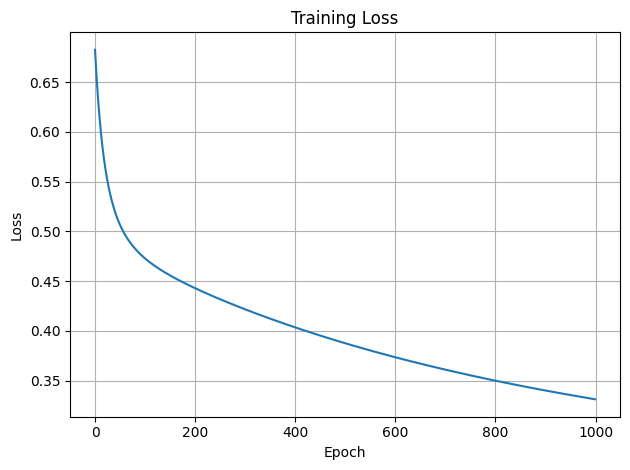

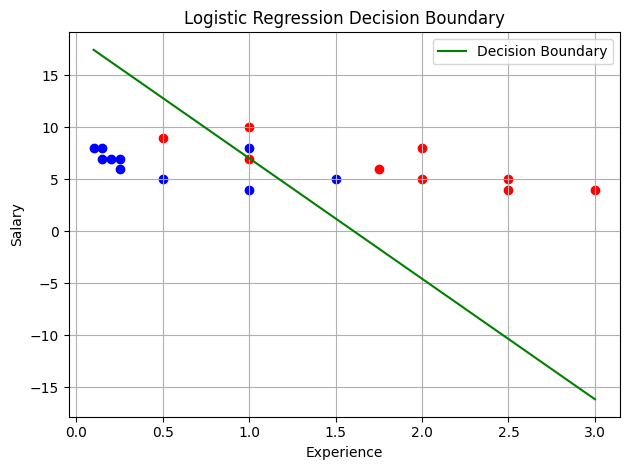

In [78]:
import math
import matplotlib.pyplot as plt

def load_csv(filename):
    X, y = [], []
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            parts = line.strip().split(',')
            if len(parts) != 3:
                continue
            exp, sal, label = float(parts[0]), float(parts[1]), int(parts[2])
            X.append([1, exp, sal])  # Add bias term
            y.append(label)
    return X, y

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(x, w):
    z = sum(x[i] * w[i] for i in range(len(w)))
    return sigmoid(z)

def compute_loss(X, y, w):
    total_loss = 0
    for i in range(len(X)):
        y_hat = predict(X[i], w)
        total_loss += -(y[i] * math.log(y_hat + 1e-15) + (1 - y[i]) * math.log(1 - y_hat + 1e-15))
    return total_loss / len(X)

def compute_gradients(X, y, w):
    gradients = [0.0] * len(w)
    for i in range(len(X)):
        y_hat = predict(X[i], w)
        error = y_hat - y[i]
        for j in range(len(w)):
            gradients[j] += error * X[i][j]
    return gradients

def train(X, y, w, lr=0.5, epochs=50):
    if len(X) == 0:
        return w, []
    
    losses = []
    for epoch in range(epochs):
        gradients = compute_gradients(X, y, w)
        
        for j in range(len(w)):
            w[j] -= lr * gradients[j] / len(X)
        
        loss = compute_loss(X, y, w)
        losses.append(loss)
        
        print(f"Epoch {epoch}: w0 = {w[0]:.6f}, w1 = {w[1]:.6f}, w2 = {w[2]:.6f}, Loss = {loss:.6f}")
    
    return w, losses

def plot_decision_boundary(X, y, w):
    for xi, yi in zip(X, y):
        color = 'red' if yi == 1 else 'blue'
        plt.scatter(xi[1], xi[2], color=color)

    x_vals = [min(x[1] for x in X), max(x[1] for x in X)]
    y_vals = [-(w[0] + w[1]*x) / w[2] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

X, y = load_csv("../loan2.csv")

if len(X) > 0:
    w = [0.0, 0.0, 0.0]
    w, losses = train(X, y, w, lr=0.1, epochs=1000)

    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plot_decision_boundary(X, y, w)

